# TTV Retrieval for Kepler-51

In this notebook, we will perform a dynamical retrieval for Kepler-51 = KOI-620. This is a system with three "super-puffs," planets with anomalously small densities, first analyzed by Masuda (2014). Hopefully, a three-planet system won't be too complex for us to handle. First, let's import packages and import data from the latest analysis of this system by Libby-Roberts et al. (2020):

In [1]:
%matplotlib inline
import ttvnest
import numpy as np

data = []
errs = []
epochs = []

#reading in from Libby-Roberts+20
fnames = ['k51b.txt', 'k51c.txt', 'k51d.txt']
def read_data(fname):
    dat = np.loadtxt(fname, skiprows = 5)
    tempdat = np.array(dat[:,1], dtype = 'float')
    tempep = np.array(dat[:,0], dtype = 'int')
    temperr = np.maximum(np.array(dat[:,2], dtype = 'float'), np.array(dat[:,3], dtype = 'float'))
    return tempdat, temperr, tempep

for fname in fnames:
    a, b, c = read_data(fname)
    data.append(a)
    errs.append(b)
    epochs.append(c)
    
epochs[1] += 1 #first transit of K51c was not observed

Let's set up the ttvnest system:

In [2]:
kepler51_b = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], 
                               mass_prior = ('Uniform', 0, 100),
                               period_prior = ('Uniform', 45.155503 - 100*0.000072, 45.155503 + 100*0.000072),
                              )

kepler51_c = ttvnest.TTVPlanet(data[1], errs[1], epochs[1], 
                               mass_prior = ('Uniform', 0, 100), 
                               period_prior = ('Uniform', 85.31287 - 100*0.00096, 85.31287 + 100*0.00096),
                              )

kepler51_d = ttvnest.TTVPlanet(data[2], errs[2], epochs[2], 
                               mass_prior = ('Uniform', 0, 100), 
                               period_prior = ('Uniform', 130.1831 - 100*0.00033, 130.1831 + 100*0.00033),
                              )

kepler51 = ttvnest.TTVSystem(kepler51_b, kepler51_c, kepler51_d)

Simulation start/reference time:  157.0
ttvnest timestep:  1.8059321200000003
Simulation length:  2791.0
Simulation end time:  2948.0


Before retrieval, let's plot the data alone to see what they look like: 

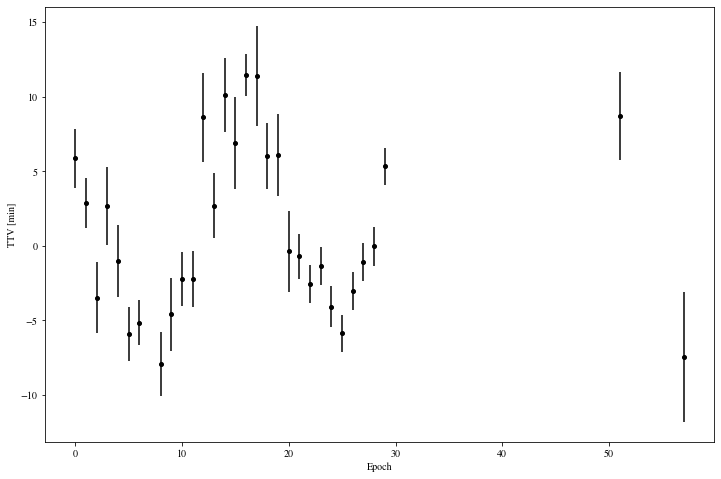

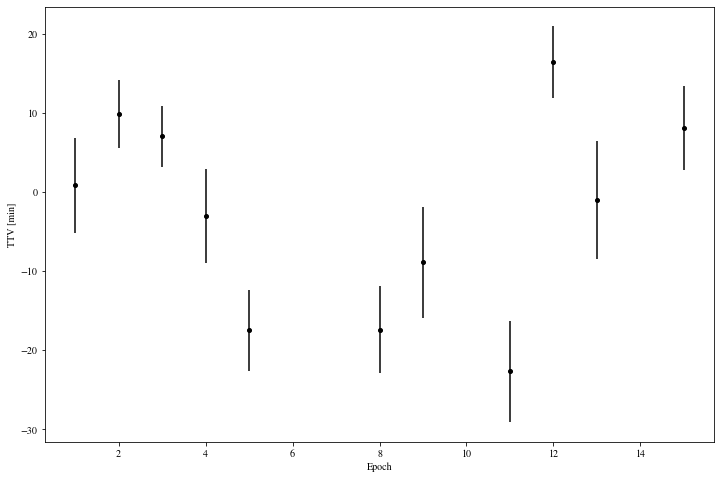

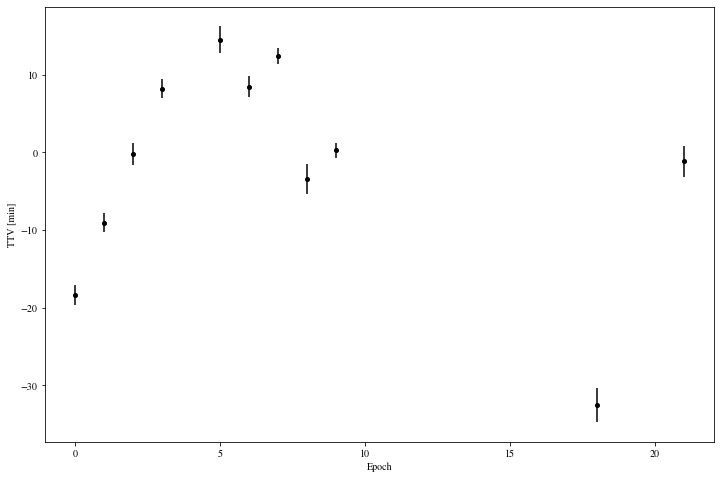

In [3]:
ttvnest.plot_utils.plot_ttv_data(kepler51)

Clear, anticorrelated signals! Now let's try to model it with ttvnest.

In [4]:
results = kepler51.retrieve()

40977it [14:15, 10.09it/s, batch: 0 | bound: 48 | nc: 25 | ncall: 515714 | eff(%):  7.930 | loglstar:   -inf < -258971.688 <    inf | logz: -259020.246 +/-    nan | dlogz: 246984.354 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
41615it [15:33, 10.60it/s, batch: 0 | bound: 53 | nc: 25 | ncall: 536822 | eff(%):  7.738 | loglstar:   -inf < -189526.075 <    inf | logz: -189575.270 +/-    nan | dlogz: 177571.134 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
41842it [16:04,  8.75it/s, batch: 0 | bound: 55 | nc: 25 | ncall: 545381 | eff(%):  7.658 | loglstar:   -inf < -170114.961 <    inf | logz: -170164.383 +/-

67585it [1:09:02,  9.17it/s, batch: 0 | bound: 260 | nc: 25 | ncall: 1316906 | eff(%):  5.128 | loglstar:   -inf < 44.728 <    inf | logz: -26.628 +/-    nan | dlogz: 164.619 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
67717it [1:09:55,  8.45it/s, batch: 0 | bound: 262 | nc: 25 | ncall: 1328998 | eff(%):  5.092 | loglstar:   -inf < 50.842 <    inf | logz: -20.663 +/-    nan | dlogz: 158.523 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor 

78085it [1:36:23, 10.18it/s, batch: 0 | bound: 347 | nc: 25 | ncall: 1721760 | eff(%):  4.533 | loglstar:   -inf < 235.821 <    inf | logz: 156.366 +/-    nan | dlogz: 23.579 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
78206it [1:38:06,  9.11it/s, batch: 0 | bound: 349 | nc: 25 | ncall: 1746193 | eff(%):  4.476 | loglstar:   -inf < 236.337 <    inf | logz: 156.846 +/-    nan | dlogz: 22.979 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
80967it [2:00:19, 11.55it/s, batch: 0 | bound: 385 | nc: 25 | ncall: 2074946 | eff(%):  3.900 | loglstar:   -inf < 247.403 <    inf | logz: 165.563 +/-    nan | dlogz: 13.938 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
81378it [2:02:28,  8.40it/s, batch: 0 | bound: 389 | nc: 26 | ncall: 2108104 | eff(%):  3.858 | loglstar:   -inf < 248

86167it [2:33:23,  8.37it/s, batch: 0 | bound: 436 | nc: 25 | ncall: 2551518 | eff(%):  3.376 | loglstar:   -inf < 259.609 <    inf | logz: 173.761 +/-    nan | dlogz:  5.461 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
86574it [2:36:59,  9.21it/s, batch: 0 | bound: 440 | nc: 25 | ncall: 2598939 | eff(%):  3.330 | loglstar:   -inf < 260.197 <    inf | logz: 174.052 +/-    nan | dlogz:  5.509 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
91497it [3:13:39,  8.71it/s, batch: 0 | bound: 490 | nc: 25 | ncall: 3127713 | eff(%):  2.924 | loglstar:   -inf < 265.053 <    inf | logz: 175.741 +/-    nan | dlogz:  0.968 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
92038it [3:16:41,  8.97it/s, batch: 0 | bound: 495 | nc: 25 | ncall: 3170554 | eff(%):  2.902 | loglstar:   -inf < 265

95217it [3:41:23, 16.45it/s, batch: 0 | bound: 532 | nc: 25 | ncall: 3666330 | eff(%):  2.596 | loglstar:   -inf < 267.098 <    inf | logz: 175.947 +/-    nan | dlogz:  0.123 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
95628it [3:43:24, 16.36it/s, batch: 0 | bound: 536 | nc: 25 | ncall: 3716663 | eff(%):  2.572 | loglstar:   -inf < 267.287 <    inf | logz: 175.953 +/-    nan | dlogz:  0.082 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-f

Let's see if we reproduce the results from Libby-Roberts et al. (2020):

In [5]:
kepler51.posterior_summary()
ttvnest.plot_utils.plot_results(kepler51, uncertainty_curves = 100, sim_length = 365.25*10, outname = 'kepler_51')

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6}$: $5.810793^{+4.096672}_{-3.676496}$
$P_1\ [\mathrm{days}]$: $45.154569^{+0.000333}_{-0.000352}$
$\sqrt{e}_1\cos(\omega_1)$: $-0.060879^{+0.069008}_{-0.0634}$
$\sqrt{e}_1\sin(\omega_1)$: $-0.139774^{+0.082858}_{-0.057323}$
$T_{0,1}\ [\mathrm{days}]$: $2.110316^{+0.000944}_{-0.00102}$
$M_2/M_\star/3\times10^{-6}$: $4.443571^{+0.871546}_{-0.758678}$
$P_2\ [\mathrm{days}]$: $85.317561^{+0.005167}_{-0.005031}$
$\sqrt{e}_2\cos(\omega_2)$: $0.057908^{+0.038311}_{-0.076143}$
$\sqrt{e}_2\sin(\omega_2)$: $-0.058693^{+0.092786}_{-0.071857}$
$T_{0,2}\ [\mathrm{days}]$: $53.005658^{+0.005816}_{-0.005257}$
$M_3/M_\star/3\times10^{-6}$: $5.767087^{+2.150886}_{-1.801322}$
$P_3\ [\mathrm{days}]$: $130.192643^{+0.004917}_{-0.003749}$
$\sqrt{e}_3\cos(\omega_3)$: $0.007374^{+0.059565}_{-0.070856}$
$\sqrt{e}_3\sin(\omega_3)$: $-0.052944^{+0.078813}_{-0.062119}$
$T_{0,3}\ [\mathrm{days}]$: $55.026887^{+0.001529}_{-0.001634}$


Looks alright! Let's make the suite of dynesty plots as well:

In [6]:
ttvnest.plot_utils.dynesty_plots(kepler51, outname = 'kepler_51')

['kepler_51_cornerplot.png',
 'kepler_51_traceplot.png',
 'kepler_51_runplot.png']

And let's save our work:

In [7]:
ttvnest.io_utils.save_results(kepler51, outname = 'kepler_51.p')

'kepler_51.p'